In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

## Perform API Calls
    Perform a weather check on each city using a series of successive API calls.
    Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
## Create dataframe of cities in list with empty columns for data
df=pd.DataFrame(cities)
df=df.rename(columns={0:'City'})
df['Cloudiness']=''
df['Country']=''
df['Date']=''
df['Humidity']=''
df['Lat']=''
df['Lng']=''
df['Max Temp']=''
df['Wind Speed']=''
print(df.shape)
df.head()

(618, 9)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tasiilaq,,,,,,,,
1,cherskiy,,,,,,,,
2,sungairaya,,,,,,,,
3,atuona,,,,,,,,
4,anadyr,,,,,,,,


In [4]:
## create base url and parameters
base_url="http://api.openweathermap.org/data/2.5/weather?"
params={"units":"imperial",
       "APPID":api_key}

In [5]:
count=1

for index, row in df.iterrows():
    
    # get city from dataframe
    city_name=row['City']
    
    # add new key to params for query search by city name
    params['q']=city_name
    
    # assemble url and make api request
    response=requests.get(base_url,params=params).json()
    
    try:
        print(f'Processing Record {count}: {city_name}')
    
        df.loc[index, 'Cloudiness']=response['clouds']['all']
        df.loc[index, 'Country']=response['sys']['country']
        df.loc[index, 'Date']=response['dt']
        df.loc[index,'Humidity']=response['main']['humidity']
        df.loc[index,'Lat']=response['coord']['lat']
        df.loc[index,'Lng']=response['coord']['lon']
        df.loc[index,'Max Temp']=response['main']['temp_max']
        df.loc[index,'Wind Speed']=response['wind']['speed']
    except(KeyError):
        print("Missing field/result...skipping")
    
    count=count+1


Processing Record 1: tasiilaq
Processing Record 2: cherskiy
Processing Record 3: sungairaya
Processing Record 4: atuona
Processing Record 5: anadyr
Processing Record 6: camp verde
Processing Record 7: luderitz
Processing Record 8: vaini
Processing Record 9: ribeira grande
Processing Record 10: iqaluit
Processing Record 11: lexington
Processing Record 12: butaritari
Processing Record 13: busselton
Processing Record 14: puerto ayora
Processing Record 15: port alfred
Processing Record 16: chokurdakh
Processing Record 17: rikitea
Processing Record 18: saint-philippe
Processing Record 19: gat
Processing Record 20: bethel
Processing Record 21: murgab
Processing Record 22: dondo
Processing Record 23: torres
Processing Record 24: taolanaro
Missing field/result...skipping
Processing Record 25: sambava
Processing Record 26: harnosand
Processing Record 27: salvador
Processing Record 28: parnamirim
Processing Record 29: lata
Processing Record 30: amapa
Processing Record 31: louisbourg
Missing fiel

Processing Record 235: arraial do cabo
Processing Record 236: bonfim
Processing Record 237: oistins
Processing Record 238: nouadhibou
Processing Record 239: iracoubo
Processing Record 240: kosya
Missing field/result...skipping
Processing Record 241: dianopolis
Missing field/result...skipping
Processing Record 242: sitka
Processing Record 243: kieta
Processing Record 244: abu samrah
Processing Record 245: kavieng
Processing Record 246: sur
Processing Record 247: juifang
Missing field/result...skipping
Processing Record 248: te anau
Processing Record 249: salekhard
Processing Record 250: sernur
Processing Record 251: ust-maya
Processing Record 252: ahipara
Processing Record 253: egvekinot
Processing Record 254: khorixas
Processing Record 255: pacific grove
Processing Record 256: sinkat
Missing field/result...skipping
Processing Record 257: altamira
Processing Record 258: qaanaaq
Processing Record 259: mentok
Missing field/result...skipping
Processing Record 260: macaboboni
Missing field/

Processing Record 466: siyabuswa
Processing Record 467: hamilton
Processing Record 468: plock
Processing Record 469: cesme
Processing Record 470: las vegas
Processing Record 471: douglas
Processing Record 472: raudeberg
Processing Record 473: kayerkan
Processing Record 474: la baule-escoublac
Processing Record 475: dubti
Processing Record 476: jalu
Processing Record 477: dzhubga
Processing Record 478: gondar
Processing Record 479: chernyshevskiy
Processing Record 480: ixtapa
Processing Record 481: haines junction
Processing Record 482: atambua
Processing Record 483: dandong
Processing Record 484: sumbawa
Missing field/result...skipping
Processing Record 485: vila franca do campo
Processing Record 486: susehri
Processing Record 487: tsienyane
Missing field/result...skipping
Processing Record 488: chupa
Processing Record 489: abu dhabi
Processing Record 490: sokoni
Processing Record 491: alta floresta
Processing Record 492: ibotirama
Processing Record 493: talaya
Processing Record 494: a

## Convert Raw Data into Dataframe
    Export the city data into a .csv.
    Display the DataFrame

In [6]:
df.to_csv(output_data_file,header=True)

In [8]:
print(df.count())
df.head()

City          618
Cloudiness    618
Country       618
Date          618
Humidity      618
Lat           618
Lng           618
Max Temp      618
Wind Speed    618
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tasiilaq,94,GL,1573597572,59,65.61,-37.64,37.4,27.51
1,cherskiy,67,RU,1573597572,84,68.75,161.3,11.79,4.65
2,sungairaya,100,ID,1573597572,95,0.7,108.9,74.71,2.82
3,atuona,0,PF,1573597572,66,-9.8,-139.03,80.28,7.25
4,anadyr,75,RU,1573597572,74,64.73,177.51,35.6,15.66


In [10]:
## investigate the data collected.
## see how many cities are missing the field results we are interested in plotting and identify those cities

missing_data_cities=[]
for index, row in df.iterrows():
    if row['Max Temp'] == '' or row['Humidity']== '' or row['Cloudiness']=='' or row['Wind Speed']== '':
        missing_data_cities.append(row['City'])
#         print(index, row)
print(len(missing_data_cities))
print(missing_data_cities)

65
['taolanaro', 'louisbourg', 'tabiauea', 'tsihombe', 'westpunt', 'mys shmidta', 'saleaula', 'padre bernardo', 'belushya guba', 'grand river south east', 'vaitupu', 'yirol', 'illoqqortoormiut', 'korla', 'asau', 'amderma', 'karauzyak', 'solovetskiy', 'rungata', 'barentsburg', 'bolshoye sorokino', 'mormugao', 'kosya', 'dianopolis', 'juifang', 'sinkat', 'mentok', 'macaboboni', 'temaraia', 'acarau', 'pinotepa nacional', 'kamenskoye', 'halalo', 'warqla', 'nizhneyansk', 'malwan', 'samusu', 'bolungarvik', 'bacuit', 'karaul', 'olafsvik', 'sentyabrskiy', 'sembe', 'sorvag', 'yambio', 'chokwe', 'sumbawa', 'tsienyane', 'asfi', 'mutsamudu', 'tumannyy', 'abu jubayhah', 'bengkulu', 'iringa', 'doctor pedro p. pena', 'rolim de moura', 'bolshoye soldatskoye', 'gurskoye', 'naftah', 'gurupa', 'maarianhamina', 'odweyne', 'achisay', 'attawapiskat', 'krasnoyarsk-45']


In [11]:
new_df=df.drop(df[df['Max Temp']==''].index)
print(new_df.count())
new_df.head()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tasiilaq,94,GL,1573597572,59,65.61,-37.64,37.4,27.51
1,cherskiy,67,RU,1573597572,84,68.75,161.3,11.79,4.65
2,sungairaya,100,ID,1573597572,95,0.7,108.9,74.71,2.82
3,atuona,0,PF,1573597572,66,-9.8,-139.03,80.28,7.25
4,anadyr,75,RU,1573597572,74,64.73,177.51,35.6,15.66


In [12]:
## storing date of data pull from dataframe in variable to use when plotting data
data_pull_date=time.localtime(new_df['Date'][0])
print(data_pull_date)
data_date=f'{data_pull_date[1]}/{data_pull_date[2]}/{data_pull_date[0]}'
print(data_date)

time.struct_time(tm_year=2019, tm_mon=11, tm_mday=12, tm_hour=16, tm_min=26, tm_sec=12, tm_wday=1, tm_yday=316, tm_isdst=0)
11/12/2019


## Plotting the Data
    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

#### Latitude vs. Max Temp

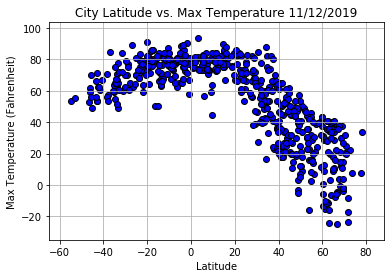

In [13]:
x_axis=new_df['Lat']
temp_data=new_df['Max Temp']

plt.scatter(x=x_axis, y=temp_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-10,max(new_df['Lat'])+10)
plt.ylim(min(new_df['Max Temp'])-10,max(new_df['Max Temp'])+10)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.title(f"City Latitude vs. Max Temperature {data_date}")
plt.grid()
plt.savefig('output_data/LatVsTemp.png')
plt.show()

#### Latitude vs. Humidity

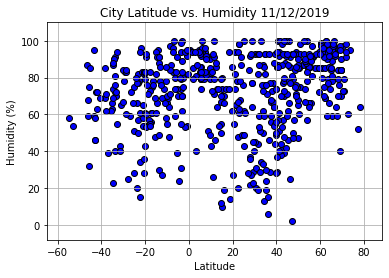

In [14]:
hum_data=new_df['Humidity']

plt.scatter(x=x_axis, y=hum_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-10,max(new_df['Lat'])+10)
plt.ylim(min(new_df['Humidity'])-10,max(new_df['Humidity'])+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {data_date}")
plt.grid()
plt.savefig('output_data/LatVsHum.png')
plt.show()

#### Latitude vs. Cloudiness

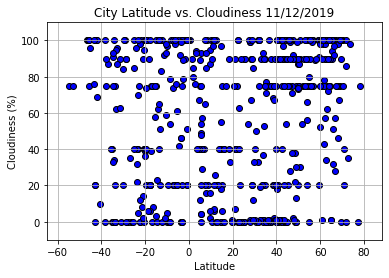

In [15]:
cld_data=new_df['Cloudiness']

plt.scatter(x=x_axis, y=cld_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-10,max(new_df['Lat'])+10)
plt.ylim(min(new_df['Cloudiness'])-10,max(new_df['Cloudiness'])+10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {data_date}")
plt.grid()
plt.savefig('output_data/LatVsClouds.png')
plt.show()

#### Latitude vs. Wind Speed

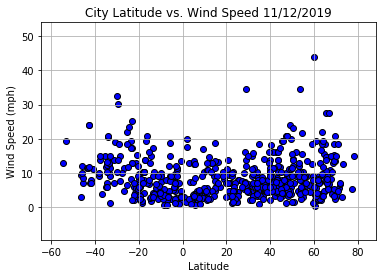

In [16]:
wsp_data=new_df['Wind Speed']

plt.scatter(x=x_axis, y=wsp_data, marker='o', facecolor='blue', edgecolors='black')
plt.xlim(min(new_df['Lat'])-10,max(new_df['Lat'])+10)
plt.ylim(min(new_df['Wind Speed'])-10,max(new_df['Wind Speed'])+10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {data_date}")
plt.grid()
plt.savefig('output_data/LatVsWind.png')
plt.show()

## My Observations: